<h2 style='color:red' align='center'>Image Recognition</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification.

1. aeroplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

In [44]:
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
import tensorflow
from tensorflow import keras

**Loading DataSet**

In [46]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape:(50000, 32, 32, 3)
y_train shape:(50000, 1)
X_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 1)


In [47]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [48]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [49]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [50]:
import matplotlib.pyplot as plt

def show_img(img, i):
    plt.figure(figsize=(4,2))
    plt.imshow(img)
    print(classes[y_train[i]])
    

frog


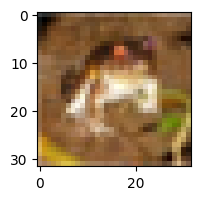

In [51]:
show_img(X_train[0], 0)

ship


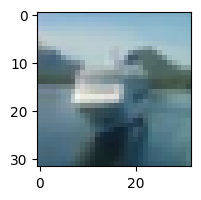

In [52]:
show_img(X_train[777], 777)

In [53]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Creating CNN Model

In [56]:
model = keras.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=25, batch_size=250)

Epoch 1/25
200/200 [==============================] - 27s 133ms/step - loss: 1.6406 - accuracy: 0.4113
Epoch 2/25
200/200 [==============================] - 27s 135ms/step - loss: 1.3183 - accuracy: 0.5338
Epoch 3/25
200/200 [==============================] - 27s 136ms/step - loss: 1.1817 - accuracy: 0.5838
Epoch 4/25
200/200 [==============================] - 27s 136ms/step - loss: 1.0863 - accuracy: 0.6211
Epoch 5/25
200/200 [==============================] - 27s 137ms/step - loss: 1.0122 - accuracy: 0.6492
Epoch 6/25
200/200 [==============================] - 27s 136ms/step - loss: 0.9609 - accuracy: 0.6675
Epoch 7/25
200/200 [==============================] - 27s 136ms/step - loss: 0.9148 - accuracy: 0.6854
Epoch 8/25
200/200 [==============================] - 27s 136ms/step - loss: 0.8744 - accuracy: 0.6986
Epoch 9/25
200/200 [==============================] - 27s 137ms/step - loss: 0.8437 - accuracy: 0.7101
Epoch 10/25
200/200 [==============================] - 28s 138ms/step - l

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9429 - accuracy: 0.7120


[0.9428680539131165, 0.7120000123977661]

In [63]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]


313/313 [==============================] - 2s 6ms/step


[3, 8, 8, 0, 6]

In [64]:
print("Test Data:",y_test[:5])
print("y_pred Data:",y_pred[:5])

Test Data: [3 8 8 0 6]
y_pred Data: [3, 8, 8, 0, 6]


### Testing with custome image

In [67]:
from PIL import Image
 
# load the image and convert into 
img = Image.open('car.jpg')

# converting it into numpy array
myimg = np.asarray(img)

# scaling
myimg = myimg / 255

# plt.imshow(img)
myimg.shape

(5066, 3761, 3)

In [68]:
from skimage.transform import resize
img_resized = resize(myimg, (32, 32))


In [69]:
img_resized.shape

(32, 32, 3)

frog


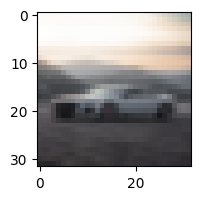

In [73]:
show_img(img_resized, 0)

In [70]:
im = np.array([img_resized])
im.shape

(1, 32, 32, 3)

In [72]:
classes[np.argmax(model.predict(im))]

1/1 [==============================] - 0s 47ms/step


'automobile'